# Main Lab
**This lab consists of three major parts as follows:**

## Clustering Agent
> * clustering class, which gets the depot and Customer's Data and returns K different clusters in which the nearest customers are grouped, further more you can see what happens visually
    using a method named "visualize".
>
> * purposes a dictionary which keeps k equal cluster formed from decomposed original customer_dataset

## VRP_Matrixes creator
> * a method that can be executed on every one of the clusters and calculate the attaching arcs of each two of them.
>
> * the root row calculator
>
> * customers' arc Matrix calculator
>
> * Visualizer

## Solvers

> * consists of three major methods :

> > * Exactmethod calculator
> >
> > * HGS Algorithm implementation
> >
> > * precesion calculator

# Clustering Agent

#  TODO


## Minimal Start
1. create an object
```
clustering_agent = clustering_agent_class(k : int, DataSet)
```

In [1]:
# Importing Dependencies

import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import sys
import warnings
import networkx as nx
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# Load the Data

In [2]:
Data = pd.read_csv('./DataSet/instances/instance_2_n439_k689.csv')

# Clustering Agent

# Clustering Agent
    ### objective : 

### Fixed Method:
    
> * Equivalence: Boolean option
    
### Methods:
    
1. constructor:
    
**Defines the initial parameters**

> * Data: DataSet which provides the position of the main depot and n customers
> 
> * K: K_Available Vehicle on the depot that the demand should get divided between vehicles equally

2. depot_remover //We don't need the depot on our clusters, every cluster will be connected to the depot.
> Arguments:
> >
> > * depot_postion on the DataSet

> OutPut:
> >
> > * DataSet Cleaned from Depot's instance

3. Transform_fit
    
**Transforms the integrated DataSet into k_equal Cluster of Customers**

**returns a dictionary, containing k_different clusters of customers**

4. Visualizer method
       
**Plotting the data to show how clusters look**    

In [3]:
class clustering_agent_class:

    def __init__ (self, k: int, data: object, depot_position = 0):
        # Constructor method
        if type(k) != int:
            raise TypeError(f"the number of the available vehicles must be an integer. but a {type(k)} was given as k!")
        self.k = k
        if type(data) != pd.core.frame.DataFrame:
            raise TypeError(f"for the argument 'data',Expected a PandasDataSet. but a {type(data)} was given as data!")
        self.data = data
        if type(depot_position) != int:
            raise TypeError(f"the position of the depot must be an integer. but a {type(k)} was given as k!")
        self.depot_position = depot_position
        
        print(f"object_created! \n {k}_available vehicles and {self.data.shape[0] -1} customers have been loaded.")

    def depot_remover(self):
        # removes the depot position from the data set
        try:
            self.depot_instance = self.data.iloc[self.depot_position]
            self.data = self.data.drop(self.depot_position).reset_index(drop=True)
            return "#1 Depot Position detached from the dataset!. however, you can access it by calling the property: depot_instance!"
        except Exception as e:
            return f"an error occurred:{e}"

    def distributer(self):
        # A more sophisticated and more accurate method to distribute the data into k cluster
        nn= NearestNeighbors(n_neighbors=self.k, algorithm='ball_tree').fit(self.data)

        distance, indices= nn.kneighbors(self.data)
        
        n_instances = len(self.data)
        
        instances_per_cluster = n_instances // self.k
        
        kmeans = KMeans(n_clusters=self.k)
        kmeans.fit(data)
        centroids = kmeans.cluster_centers_
        
        # Use k-nearest neighbors to assign instances to clusters
        nn = NearestNeighbors(n_neighbors=self.k)
        nn.fit(centroids)
        distances, indices = nn.kneighbors(self.data)
        # Assign instances to clusters based on nearest centroid
        cluster_assignments = np.zeros(n_instances)
        for i in range(n_instances):
            cluster_assignments[i] = int(indices[i][0])
        
        # Ensure equal capacity for each cluster
        cluster_counts = np.bincount(cluster_assignments.astype(int))
        for i in range(0,k-1):
            while cluster_counts[i] > instances_per_cluster:
                # Find the instance farthest from its centroid in the cluster
                max_distance_idx = np.argmax(distances[cluster_assignments == i])
                # Reassign the instance to the nearest cluster with lower count
                new_cluster = np.argmin(cluster_counts)
                cluster_assignments[max_distance_idx] = int(new_cluster)
                cluster_counts[i] -= 1
                cluster_counts[new_cluster] += 1
        return cluster_assignments
    
    def transform(self):
        # This method splits the dataset between k equal clusters, using the k_nearest neighbor algorithm!
        
        # Removing the depot position
        result = self.depot_remover()
        print(result)
        # Distributing the data into clusters
        np.random.seed(42)
        
        self.kmeans = KMeans(n_clusters=self.k, random_state=1)
        self.cluster_label = self.kmeans.fit_predict(self.data)
        distribution_labels_array = self.kmeans.labels_
        # distribution_labels_array = self.distributer()
        distribution_labels_dataset = pd.DataFrame(distribution_labels_array, columns=["cluster"])
        self.distributed_data = pd.concat([self.data, distribution_labels_dataset], axis=1)
        print("#2 the clustering Procedure Completed!")
        return self.distributed_data
    
    def fit(self):
        # Generating clusters 
        self.clusters = {x: pd.DataFrame(columns=["X","Y"]) for x in range(0,self.k-1)}
        self.clusters["k"] = self.k
        self.clusters["report"] = {}
        distributed_DataSet = self.transform()
        # Putting the DEPOT Location into the Clusters dictionary
        self.clusters["depot"] = self.depot_instance
        # Assign the Data into clusters
        for _ in range(0,self.k):
            # The distribution of Data in the current cluster
            distribution = distributed_DataSet.iloc[distributed_DataSet["cluster"].values == _]
            self.clusters["report"][_] = len(distribution)
            self.clusters[_] = distribution[["X","Y"]]
        print(f"#3 All Clusters Formed!\n {self.clusters['report']}")
        return self.clusters
    
    def visualize(self, legend=True):
        # Visualizing the Clustered data
        unique_labels = np.unique(self.cluster_label)
        # getting the Centroids
        centroids = self.kmeans.cluster_centers_
        for _ in unique_labels:
            distribution = self.clusters[_]
            plt.scatter(distribution["X"], distribution["Y"], label = f"cluster_{_}")
        plt.scatter(centroids[:,0] , centroids[:,1] , s = 40, color = 'k', label="centroids")
        plt.scatter(self.depot_instance["X"] , self.depot_instance["Y"] , s = 120, color = 'r', marker="*", label="depot")
        if legend:
            plt.legend()
        plt.show()

In [4]:
x = clustering_agent_class(25, Data)

object_created! 
 25_available vehicles and 439 customers have been loaded.


In [5]:
distribution_dict = x.fit()


#1 Depot Position detached from the dataset!. however, you can access it by calling the property: depot_instance!
#2 the clustering Procedure Completed!
#3 All Clusters Formed!
 {0: 18, 1: 18, 2: 22, 3: 18, 4: 15, 5: 15, 6: 21, 7: 21, 8: 21, 9: 25, 10: 21, 11: 11, 12: 27, 13: 10, 14: 23, 15: 15, 16: 13, 17: 24, 18: 16, 19: 15, 20: 14, 21: 8, 22: 19, 23: 16, 24: 13}


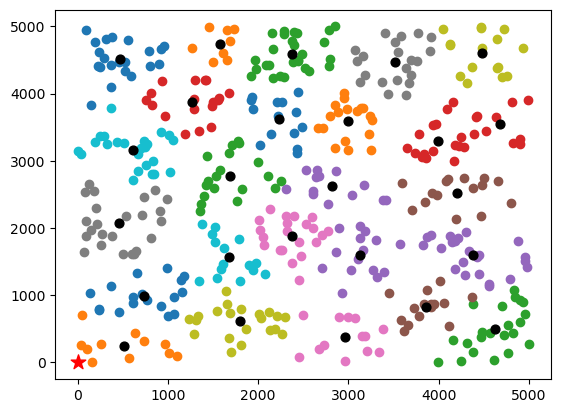

In [6]:
x.visualize(legend=False)

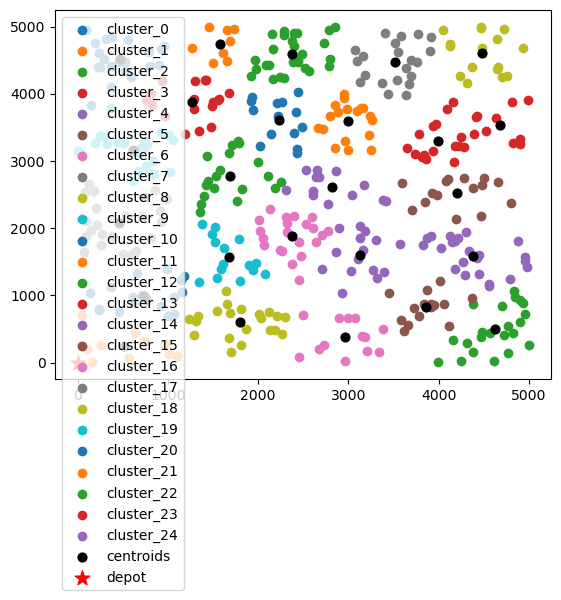

In [7]:
x.visualize()

# Varient Graph Creator

**Provides the Varient Graph for each cluster**
for each cluster
G = (V, A), where V: is the vertex set, and A is the Arc Set

> * vertex set (V) contains the depot and all customers in that cluster.
>
> * Each arc(i, j) 𝞊 A has a weight dij >= 0 t that represents the travelling cost (in this sample : distance between every two vertex in the cluster).

**This function gets an individual vertex DataFrame of an individual cluster,depot instance included,
and returns the generated ARC Matrix.**

In [8]:
def Arc_Mat_generator(distribution_dict: dict):
    """
    Objective: Computing Varient Graph for each cluster
    
    Takes the Distribution dictionary that was calculated on the above cell,
    and feeds every cluster to sub_procedure module 

    
    """
    def sub_procedure(vertex):
        """
        # Calculating the Arc Matrix for the given vertex set

        Gets: vertex: PandasDataFrame that consists of an individual Cluster's data and the depot 
        position.

        Returns:
        Arc_matrix
        """
        def distance_calculator(loc_i, vertex_vector):
            # Calculates the Euclidean distance between two different location
            loc_i_X = loc_i[:, 0]
            loc_i_Y = loc_i[:, 1]
            vertex_vector_X = vertex_vector[:, 0]
            vertex_vector_Y = vertex_vector[:, 1]
            distance_vector = np.sqrt((loc_i_X-vertex_vector_X)**2 + (loc_i_Y-vertex_vector_Y)**2)
            return distance_vector
        # length of the vertex list
        n_ = len(vertex)
        # Part Paralization
        id_list = list(vertex.index)
        distance_matrix = np.zeros([n_, n_]) 
        vertex_vector = np.array(vertex)
        for _ in range(0,len(id_list)):
            current_vertex = vertex.loc[id_list[_]]
            # computing distances
            intended_vertex_vector = np.array([[current_vertex["X"],current_vertex["Y"]]]*n_)
            # computing the n_ * 1 distance vector
            # ith_Matrix_vector
            ith_distance_vector = distance_calculator(intended_vertex_vector, vertex_vector)
            distance_matrix[:, _] = ith_distance_vector
         
        return distance_matrix, id_list

            
    clusters = {}    
    for _ in range(0, distribution_dict["k"]):
        vertex_PDF = pd.DataFrame(columns = ["X","Y"])
        vertex_PDF.loc['d'] = [distribution_dict["depot"]["X"], distribution_dict["depot"]["Y"]]
        vertex_PDF = pd.DataFrame(pd.concat([vertex_PDF,distribution_dict[_]]))
        # print(f"{_}:",vertex_PDF)
        distance_matrix, id_list = sub_procedure(vertex_PDF)
        distances_DF = pd.DataFrame(distance_matrix)
        distances_DF.index = id_list
        distances_DF.columns = id_list
        # Data Normalization
        distances_DF=distances_DF/1000
        distances_DF=distances_DF.round(3)
        vertices_set = id_list
        clusters[_] = {"V" : vertices_set,
                       "locations": vertex_PDF,
                       "E" : distances_DF}
    return clusters

In [9]:
clusters = Arc_Mat_generator(distribution_dict)
# To have the Arc Matrix , only thing we have to do is mapping the index into vertex_list

In [10]:
for item in list(clusters.keys()):
    locations = clusters[item]["locations"]
    edges = clusters[item]['E']
    vertices = clusters[item]['V']
    print(f"cluster: cluster{item}\n \n * Edges:" ,f"\n {edges}\n \n * Vertices: {vertices} \n \n * Locations : \n {locations.describe()}")
    break

cluster: cluster0
 
 * Edges: 
          d     39     99    139    156    169    199    209    259    260  \
d    0.000  0.885  0.815  1.191  1.149  1.489  1.043  1.713  1.750  1.561   
39   0.885  0.000  0.231  0.386  0.264  0.613  0.428  0.833  0.897  0.756   
99   0.815  0.231  0.000  0.377  0.426  0.699  0.270  0.978  1.078  0.966   
139  1.191  0.386  0.377  0.000  0.288  0.351  0.256  0.673  0.824  0.793   
156  1.149  0.264  0.426  0.288  0.000  0.366  0.481  0.570  0.652  0.553   
169  1.489  0.613  0.699  0.351  0.366  0.000  0.604  0.338  0.524  0.580   
199  1.043  0.428  0.270  0.256  0.481  0.604  0.000  0.930  1.077  1.025   
209  1.713  0.833  0.978  0.673  0.570  0.338  0.930  0.000  0.218  0.393   
259  1.750  0.897  1.078  0.824  0.652  0.524  1.077  0.218  0.000  0.249   
260  1.561  0.756  0.966  0.793  0.553  0.580  1.025  0.393  0.249  0.000   
272  1.213  0.539  0.770  0.762  0.475  0.726  0.926  0.705  0.627  0.387   
323  1.445  0.645  0.858  0.712  0.455  0.54

# VRP Solver

* lower bound

* searching heuristic

* Optimization method: christofides
    > * T Initializing
    > * itterate till convergence of T to 0
    >

In [78]:
class search :

    def __init__(self, V, E, locations):
        # TODO
        # taking the code into a standard format and write error handlers
        # gettig G(V, E) /V : vertices , E/ Edge Matrix
        self.E = E # DataFrame
        self.V = V # Vertice list
        self.locations = locations # Correspond location with V (vertices)
        self.G = (self.V, self.E)
        self.Updated_data = {
                "vertices" : None,
                "Edges": None
            }    

        # print(f"* Edges:\n {self.E.describe()}\n \n * Vertices: {self.V} \n \n * Locations : \n {self.locations.describe()}")

        print("Data Loaded!")

    def helper_Edge_DataFrame_Transformer(self):
        """
        # Helper Function 
        ## Transforms Edge's Data into other shapes

        * Inputed DataFrame Structure:
            Indexes: Vertices list
            Columns: Vertices list
            Data(in each row): Traveling Costs between the pointed vertice in the index and Vertices from Vertices list.
        
        * OutPuted DataFrame Structure:
            Index: Origin Vertice
            Columns: ["Destination", "Cost"]
            Data(in each row): Destination: Vertice, Cost: Travelling Cost of going from the Vertice in the Index and the destination Vertice.
        """
        # Loading the former Edge Matrix, which needs to get transformed
        Edges = self.E
        
            
    def kruskals_MST(self, V, E):
        """
        Calculates the minimum spanning tree (MST) using Prim's algorithm.
        
        Args:
          V: List of vertices in the graph.
          E: Pandas DataFrame representing the edges, with columns for source, destination, and weight. Edge (source, destination, weight)
        
        Returns:
          Pandas DataFrame representing the MST, that maps origins to destinations.
        """
        # holds the resulted MST as a Pandas DataFrame
        result = pd.DataFrame(columns=["destination", "distance"])
        
        # Re_ordering Edge DataSet
        

    def MST_Calculator_Prims_Algorithm(self, V, E):
          """
          Calculates the minimum spanning tree (MST) using Prim's algorithm.
        
          Args:
              V: List of vertices in the graph.
              E: Pandas DataFrame representing the edges, with columns for source, destination, and weight.
        
          Returns:
              Pandas DataFrame representing the MST, with columns for destination and distance.
          """
          import heapq
          # Initialize variables
          MST = pd.DataFrame(columns=["destination", "distance"])
          processed_vertices = [V[0]]  # Start with an arbitrary vertex
          unprocessed_vertices = set(V) - {V[0]}  # Convert V to set for faster membership checks
          min_heap = [(float('inf'), vertex) for vertex in unprocessed_vertices]  # Use heapq for efficient edge selection
          heapq.heapify(min_heap)  # Initialize min-heap
        
          # Main loop: iterate until all vertices are processed
          while unprocessed_vertices:
            # Get vertex with minimum edge weight from processed vertices to unprocessed
            current_weight, current_vertex = heapq.heappop(min_heap)
            unprocessed_vertices.remove(current_vertex)  # Remove vertex from unprocessed set
        
            # Add edge to MST (if not already present)
            if current_vertex not in MST.index.tolist():
              MST.loc[current_vertex] = [processed_vertices[0], current_weight]  # Assuming processed_vertices[0] is parent
            else:
              # Handle potential duplicate edges (optional): update MST if lower weight found
              existing_weight = MST.loc[current_vertex, "distance"]
              if current_weight < existing_weight:
                MST.loc[current_vertex] = [processed_vertices[0], current_weight]
        
            # Update min-heap for adjacent vertices
            for neighbor in E[E.source == current_vertex].destination.tolist():
              if neighbor in unprocessed_vertices:
                edge_weight = E[(E.source == current_vertex) & (E.destination == neighbor)].weight.values[0]
                new_weight = min(edge_weight, min_heap[unprocessed_vertices.index((neighbor, edge_weight))][0])  # Update weight in heap
                heapq.heapreplace(min_heap, (new_weight, neighbor))  # Update min-heap efficiently
        
          return MST
    
        
    def Lowerbound_calculator(self):
        # 1_tree
        E = self.E.copy()
        V= self.V.copy()
        MST_with_max_L = 0
        max_weight = 0
        for vertex in V:
            vertices = V.copy()
            filtered_Edges = E.copy()
            
            vertices.remove(vertex)
            distances_vertex = E[vertex]
            filtered_Edges=filtered_Edges.drop([vertex], axis=1)
            filtered_Edges=filtered_Edges.drop([vertex], axis=0)
            MST = self.MST_Calculator_Prims_Algorithm(vertices, filtered_Edges)
            D=distances_vertex[distances_vertex > 0.1].min()
            next_vertex = E.loc[E[vertex] == D].index[0]
            MST.loc[vertex] = (next_vertex, D)
            D2 = distances_vertex[distances_vertex > D].min()
            next_vertex2 = E.loc[E[vertex] == D2].index[0]
            MST.loc[f"{vertex}_2"] = (next_vertex2, D2)
            total_distance = MST["distance"].sum().round(3)
            if total_distance > max_weight:
                max_weight = total_distance
                MST_with_max_L = MST 
                self.degrees[vertex] += 2
                self.degrees[next_vertex] += 1
                self.degrees[next_vertex2] += 1
                degrees = self.degrees
                
            
        self.lower_bound_rate = max_weight
        return (max_weight, MST_with_max_L)
        
    def M_W_M(self,odd_verts):
        
        G = nx.Graph()
        for i in range(len(odd_verts)):
            for j in range(i+1, len(odd_verts)):
                G.add_edge(odd_verts[i], odd_verts[j], weight=self.E.loc[odd_verts[i], odd_verts[j]])

        matching=nx.algorithms.matching.max_weight_matching(G)
       
        return list(matching)
    
    def multi_graph(self, MST_edges, M_W_M_edges):
        multigraph = nx.MultiGraph()
        multigraph.add_edges_from(MST_edges)
        multigraph.add_edges_from(M_W_M_edges)
        return multigraph
        
    def eulerian_tour(self,Multi_graph):
        if nx.is_eulerian(Multi_graph):
            # Construct an Eulerian tour
            eulerian_tour = list(nx.eulerian_circuit(Multi_graph))
        return eulerian_tour
    def cutting_annomal_cycles(self,eulerian_tour):
        """
        Each customer should visit once in a trip
        """
        TSP_tour = []
        degree = {k:0 for k in self.V}
        annomoly = False
        for _ in range(0,len(eulerian_tour)):
            if annomoly:
                annomoly = False
                continue
            if degree[eulerian_tour[_][1]] == 2:
                TSP_tour.append((eulerian_tour[_][0], eulerian_tour[_+1][1])) 
                annomoly = True
                continue
            else:
                TSP_tour.append((eulerian_tour[_][0], eulerian_tour[_][1]))
                degree[eulerian_tour[_][1]] += 1
                degree[eulerian_tour[_][0]] += 1

        return TSP_tour
    
    def cost_calculator(self, TSP_Rout, E):
        total_cost = 0
        for (i, j) in TSP_Rout:
            total_cost+=E.loc[i, j]
        return total_cost
    def Christofides_method(self):
        # TODO
        # Implementing Christofides Algorithm

        # MST
        MST_edges = []
        vertices = self.V
        MST = self.MST_Calculator_Prims_Algorithm(self.V, self.E)
        
        odd_vertices = list(filter(lambda key: self.degrees[key] % 2 != 0,list(self.degrees.keys())))
        MWM_edges = self.M_W_M(odd_vertices)
        
        for _ in MST.index.tolist():
            origin = _
            destination = MST.loc[_]['destination']
            if type(_) == 'str':
                if '_2' in _:
                    origin = _.strip(_2)
            MST_edges.append((origin, destination))
        Multi_graph = self.multi_graph(MST_edges, MWM_edges)
        eulerian_tour = self.eulerian_tour(Multi_graph)
        tsp_tour = self.cutting_annomal_cycles(eulerian_tour)
        total_cost = self.cost_calculator(tsp_tour, self.E)
        return (tsp_tour, total_cost)
    
    def accuracy(self, solution_cost, lower_bound_rate):
        # ToDo
        # Check the difference between Christofides score and the lower bound 
        lower_bound = lower_bound_rate
        solution_max_cost = solution_cost
        accuracy = solution_max_cost/lower_bound
        return accuracy

    
    def main_visualizer(self,ax):
        """
        # Main Visualizer
        Visualizes the current state of the Route Evolution
        * Parameters:
            updated_data
                1. vertices: Pandas DataFrame containing Locations
                2. edges: Pandas DataFrame or Tupple in the shape of : (origin, destination)
        * Returns :
            ""__Nothing__""
        
        Note: This Procedure will be used to plot every indivisual step and then the Procedure animator will animate updates
        """
        # Ploting Vertices
        vertices = self.Updated_data["vertices"]
        edges = self.Updated_data["Edges"]
        ax.clear()

        depot = vertices.loc['d']
        
        # Each edge connects two specific nodes
        labels = vertices.index.tolist()
        ax.scatter(vertices["X"], vertices["Y"], color='g')
        order = 0
        for i, label in enumerate(labels):
            x = vertices.loc[label, "X"]
            y = vertices.loc[label, "Y"]
            ax.scatter(x, y, color='g', label=label)  # Use label argument for automatic labeling
            plt.text(x, y, str(order), fontsize=12, color='black', ha='center', va='center')  # Optional additional text
            order +=1
        ax.scatter(depot["X"] , depot["Y"], s = 120, color = 'r', marker="*", label="depot")
       
        ax.plot(edges["origin"], edges["destinations"], linestyle='-')
    def live_plot(self):
        """
        # Live Plot

        This Procedure plot every mutation within the data
        with utilizing the main visualizer.

        *Parameters: 
            visualizer_procedure : A Pointer to the main visualizer module.
        *Returns:
            __Nothing__
        """
        # Closing Previous One
        plt.close()
        # Opening a new figure
        fig = plt.figure(figsize=(5, 5))
        ax = fig.subplots(1,1)
        live = animation.FuncAnimation(fig, self.main_visualizer(ax), interval=1000)
        plt.show()
        
    def solve_TSP(self):
        """
        integrator of classes methods
        """
        
        solution = []
        pr_process = dt.now()
        lower_band_cost, LB_1_tree = self.Lowerbound_calculator()
        loc_edge_dataFrame = pd.DataFrame(columns = ["origin", "destinations"])
        tsp_tour, solution_cost  = self.Christofides_method()
        post_process = dt.now()
        
        for (origin, destination) in tsp_tour:
            if destination == 'd':
                solution.append(origin)
                solution.append(destination)
                
            else:
                solution.append(origin)
            
            loc_edge_dataFrame.loc[len(loc_edge_dataFrame)] = [self.locations.loc[origin]["X"], self.locations.loc[origin]["Y"]]
        loc_edge_dataFrame.loc[len(loc_edge_dataFrame)] = [self.locations.loc['d']["X"], self.locations.loc['d']["Y"]]
        self.Updated_data['Edges'] , self.Updated_data['vertices'] = loc_edge_dataFrame, self.locations
        time = post_process - pr_process
        accuracy = self.accuracy(solution_cost, self.lower_bound_rate)
        self.live_plot()
        # acceptance criterion
        return solution, time, accuracy, solution_cost
        
        
class Optimizors(search):

    def __init__(self, T, Initial_solution, Initial_L1, lower_bound_rate, E, V, locations, itteration):
        # Get the initial parameters and data
        self.temperature = T
        # initializing the solution
        self.initial_solution = Initial_solution # A Dictionary of , the solution its own , its taken amount of time , and its total cost
        self.initial_cost = Initial_L1
        # this class inherits properties such as V and E , and also 
        # correctness rate
        self.delta = lambda T, L1,L2: np.exp(-abs(L2-L1)/T)
        self.iterations = itteration
        self.E = E
        self.V = V
        self.locations = locations
        self.lower_bound_rate = lower_bound_rate
        self.Updated_data = {
                "vertices" : None,
                "Edges": None
            }    
    def local_search_2opt(self, initial_solution):
        """
        Replacing _ 2 random edge 
        """
        idx = []
        solution = []
        current_solution = initial_solution.copy()
        
        idx = random.randint(2, len(current_solution)-2)
        current_solution[idx],current_solution[idx-1] = current_solution[idx-1],current_solution[idx] 
        # print("current_solution:",current_solution)
        for _ in range(len(current_solution)):
            # print("vertice:",current_solution[_])
            if _ == len(current_solution)-2:
                break
            item = (current_solution[_], current_solution[_+1])
            solution.append(item)
            # print(solution)
            
        # print("solution:",solution)
        cost = self.cost_calculator(solution, self.E)
        # print("cost:", cost)
        return current_solution, cost

   
    def simulated_annealing_V2(self):
        """
        Implements the simulated annealing optimization method.
    
        Returns:
            tuple: (best_solution, time, accuracy, final_cost)
        """
        current_solution = self.initial_solution
        best_solution, best_cost = current_solution, self.initial_cost  # Initialize best solution
    
        pre_process_time = dt.now()

        for _ in range(self.iterations):
            current_temperature = self.temperature
            while current_temperature > 0:
                candidate_solution, candidate_cost = self.local_search_2opt(current_solution)
                delta = self.delta(current_temperature, best_cost, candidate_cost)
    
                if candidate_cost < best_cost:
                    # Always accept better solutions
                    best_solution = candidate_solution
                    best_cost = candidate_cost
                else:
                    # Accept worse solutions with a probability based on delta and temperature
                    if random.random() < np.exp(-delta / current_temperature):
                        current_solution = candidate_solution
    
                current_temperature = current_temperature - np.exp(- 2 * abs(delta))
            
        post_process_time = dt.now()
        time = post_process_time - pre_process_time
        accuracy = self.accuracy(best_cost, self.lower_bound_rate)
    
        return best_solution, time, accuracy, best_cost

    def main_visualizer(self,ax):
        """
        # Main Visualizer
        Visua;izes the current state of the Route Evolution
        * Parameters:
            updated_data
                1. vertices : Pandas DataFrame containing Locations
                2. edges : Pandas DataFrame or tupple in the shape of : (origin, destination)
        * Returns :
            ""__Nothing__""
        
        Note: This Procedure will be used to plot every indiviual step and then the Procedure animator will animate updates
        """
        # Ploting Vertices
        vertices = self.Updated_data["vertices"]
        edges = self.Updated_data["Edges"]
        ax.clear()
        depot = vertices.loc['d']
        labels = vertices.index.to_list()
        # Each edge connects two specific nodes
        
        ax.scatter(vertices["X"], vertices["Y"], label = "0", color='g')
        order = 0
        for i, label in enumerate(labels):
            x = vertices.loc[label, "X"]
            y = vertices.loc[label, "Y"]
            ax.scatter(x, y, color='g', label=label)  # Use label argument for automatic labeling
            plt.text(x, y, str(label), fontsize=12, color='black', ha='center', va='center')  # Optional additional text
        ax.scatter(depot["X"] , depot["Y"], s = 120, color = 'r', marker="*", label="depot")
        ax.plot(edges["origin"], edges["destinations"], linestyle='-')
    def live_plot(self):
        """
        # Live Plot

        This Procedure plot every mutation within the data
        with utilizing the main visualizer.

        *Parameters: 
            visualizer_procedure : A Pointer to the main visualizer module.
        *Returns:
            __Nothing__
        """
        # Closing Previous One
        plt.close()
        # Opening a new figure
        fig = plt.figure(figsize=(5, 5))
        ax = fig.subplots(1,1)
        live = animation.FuncAnimation(fig, self.main_visualizer(ax), interval=1000)
        plt.show()
        
    def optimize(self):
        solution, time,accuracy,cost = self.simulated_annealing_V2()
        loc_edge_dataFrame = pd.DataFrame(columns = ["origin", "destinations"])
        for _ in solution:
            loc_edge_dataFrame.loc[len(loc_edge_dataFrame)] = [self.locations.loc[_]["X"], self.locations.loc[_]["Y"]]
            
        self.Updated_data['Edges'], self.Updated_data['vertices'] = loc_edge_dataFrame, self.locations

        self.live_plot()
        return solution, time,accuracy,cost

IndentationError: unexpected indent (917310489.py, line 100)

In [79]:
class Optimizors_V2:

    def __init__(self, T, initial_solution, initial_cost, lower_bound_rate, E, V, locations, iterations):
        """
        Initializes the optimizer with necessary parameters.

        Args:
            T (float): Initial temperature for simulated annealing.
            initial_solution (dict): Dictionary representing the initial route solution.
            initial_cost (float): Cost of the initial solution.
            lower_bound_rate (float): Lower bound rate for accuracy calculation.
            E (dict): Edge distance information (origin, destination, distance).
            V (dict): Vertices information (id, x-coordinate, y-coordinate).
            locations (pd.DataFrame): DataFrame containing location information.
            iterations (int): Number of iterations for simulated annealing.
        """

        self.temperature = T
        self.initial_solution = initial_solution
        self.initial_cost = initial_cost
        self.delta = lambda T, L1, L2: np.exp(-abs(L2 - L1) / T)  # Delta calculation function
        self.iterations = iterations
        self.E = E
        self.V = V
        self.locations = locations
        self.lower_bound_rate = lower_bound_rate  # Corrected typo
        self.updated_data = {"vertices": None, "edges": None}  # Updated data format

    def local_search_2opt(self, current_solution):
        """
        Performs a 2-opt exchange to improve the route.

        Args:
            current_solution (list): Current route solution.

        Returns:
            tuple: New solution and its cost.
        """

        new_solution = current_solution.copy()
        i, j = random.sample(range(1, len(current_solution) - 2), 2)  # Select random non-endpoint indices
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]  # Reverse the sub-segment
        new_cost = self.cost_calculator(new_solution, self.E)  # Calculate cost of new solution
        return new_solution, new_cost

    def cost_calculator(self, TSP_Rout, E):
        total_cost = 0
        for i in range(len(TSP_Rout)-2):
            total_cost+=E.loc[TSP_Rout[i], TSP_Rout[i+1]]
        return total_cost
    
    def simulated_annealing(self):
        """
        Implements the simulated annealing algorithm for route optimization.

        Returns:
            tuple: Best solution, time taken, accuracy, and final cost.
        """

        current_solution = self.initial_solution
        best_solution, best_cost = current_solution, self.initial_cost
        start_time = dt.now()

        for _ in range(self.iterations):
            current_temperature = self.temperature
            while current_temperature > 0:
                candidate_solution, candidate_cost = self.local_search_2opt(current_solution)
                delta = self.delta(current_temperature, best_cost, candidate_cost)

                if candidate_cost < best_cost:
                    # Always accept better solutions
                    best_solution = candidate_solution
                    best_cost = candidate_cost
                else:
                    # Accept worse solutions with a probability based on delta and temperature
                    if random.random() < np.exp(-delta / current_temperature):
                        current_solution = candidate_solution

                current_temperature = current_temperature - np.exp(-2 * abs(delta))

        end_time = dt.now()
        time_taken = end_time - start_time
        accuracy = self.accuracy(best_cost, self.lower_bound_rate)  # Calculate accuracy

        return best_solution, time_taken, accuracy, best_cost

    def accuracy(self, cost, lower_bound_rate):
        """
        Calculates the accuracy of the solution (implementation needed based on your specific problem).

        Args:
            cost (float): Cost of the solution.
            lower_bound_rate (float): Lower bound rate for accuracy calculation.

        Returns:
            float: Accuracy value (implementation needed).
        """

        # Implement your accuracy calculation logic here
        accuracy = ((cost / lower_bound_rate))
        return accuracy
    
    def optimize(self):
        best_solution, time_taken, accuracy, best_cost = self.simulated_annealing()
        loc_edge_dataFrame = pd.DataFrame(columns = ["origin", "destinations"])
        for _ in best_solution:
            loc_edge_dataFrame.loc[len(loc_edge_dataFrame)] = [self.locations.loc[_]["X"], self.locations.loc[_]["Y"]]
            
        self.updated_data['Edges'], self.updated_data['vertices'] = loc_edge_dataFrame, self.locations

        self.live_plot()
        return best_solution, time_taken, accuracy, best_cost
    
    
    def main_visualizer(self,ax):
        """
        # Main Visualizer
        Visua;izes the current state of the Route Evolution
        * Parameters:
            updated_data
                1. vertices : Pandas DataFrame containing Locations
                2. edges : Pandas DataFrame or tupple in the shape of : (origin, destination)
        * Returns :
            ""__Nothing__""
        
        Note: This Procedure will be used to plot every indiviual step and then the Procedure animator will animate updates
        """
        # Ploting Vertices
        vertices = self.updated_data["vertices"]
        edges = self.updated_data["Edges"]
        ax.clear()
        depot = vertices.loc['d']
        labels = vertices.index.to_list()
        # Each edge connects two specific nodes
        
        ax.scatter(vertices["X"], vertices["Y"], label = "0", color='g')
        order = 0
        for i, label in enumerate(labels):
            x = vertices.loc[label, "X"]
            y = vertices.loc[label, "Y"]
            ax.scatter(x, y, color='g', label=label)  # Use label argument for automatic labeling
            plt.text(x, y, str(label), fontsize=12, color='black', ha='center', va='center')  # Optional additional text
        ax.scatter(depot["X"] , depot["Y"], s = 120, color = 'r', marker="*", label="depot")
        ax.plot(edges["origin"], edges["destinations"], linestyle='-')
    
    def live_plot(self):
        """
        # Live Plot

        This Procedure plot every mutation within the data
        with utilizing the main visualizer.

        *Parameters: 
            visualizer_procedure : A Pointer to the main visualizer module.
        *Returns:
            __Nothing__
        """
        # Closing Previous One
        plt.close()
        # Opening a new figure
        fig = plt.figure(figsize=(5, 5))
        ax = fig.subplots(1,1)
        live = animation.FuncAnimation(fig, self.main_visualizer(ax), interval=1000)
        plt.show()

In [ ]:
for item in list(clusters.keys()):
    locations = clusters[item]["locations"]
    edges = clusters[item]['E']
    
    vertices = clusters[item]['V'].copy()
    print("______________________________________________________________")
    print("\nCluster:",item)

    # print("edges:\n",edges)
    
    s = search(vertices, edges, locations)
    print("____________________TSP_Initial______________________")
    # christofiddes
    tsp_tour, time, accuracy, cost= s.solve_TSP()
    print(f"Rout_{item}: {tsp_tour} \n executed in {time} \n precision: {accuracy} \n cost: {cost}")
    print("____________________Optimization______________________")
    
    optimize = Optimizors_V2(20, tsp_tour, cost,s.lower_bound_rate, edges, vertices,locations, 1000)
    optimal_solution, time_optimized, accuracy_optimized, cost_optimized=optimize.optimize()
    print(f"Rout_{item}: {optimal_solution} \n executed in {time_optimized} \n precision: {accuracy_optimized} \n cost: {cost_optimized}")

In [ ]:
for item in list(clusters.keys()):
    locations = clusters[item]["locations"]
    edges = clusters[item]['E']
    
    vertices = clusters[item]['V'].copy()
    print("______________________________________________________________")
    print("\nCluster:",item)

    # print("edges:\n",edges)
    
    s = search(vertices, edges, locations)
    print("____________________TSP_Initial______________________")
    # christofiddes
    tsp_tour, time, accuracy, cost= s.solve_TSP()
    print(f"Rout_{item}: {tsp_tour} \n executed in {time} \n precision: {accuracy} \n cost: {cost}")
    print("____________________Optimization______________________")
    
    optimize = Optimizors(5, tsp_tour, cost,s.lower_bound_rate, edges, vertices,locations, 100)
    optimal_solution, time_optimized, accuracy_optimized, cost_optimized=optimize.optimize()
    print(f"Rout_{item}: {optimal_solution} \n executed in {time_optimized} \n precision: {accuracy_optimized} \n cost: {cost_optimized}")

In [ ]:
for item in list(clusters.keys()):
    locations = clusters[item]["locations"]
    edges = clusters[item]['E']
    
    vertices = clusters[item]['V'].copy()
    print("______________________________________________________________")
    print("\nCluster:",item)

    # print("edges:\n",edges)
    
    s = search(vertices, edges, locations)
    print("____________________TSP_Initial______________________")
    # christofiddes
    tsp_tour, time, accuracy, cost= s.solve_TSP()
    print(f"Rout_{item}: {tsp_tour} \n executed in {time} \n precision: {accuracy} \n cost: {cost}")
    print("____________________Optimization______________________")
    
    optimize = Optimizors(5, tsp_tour, cost,s.lower_bound_rate, edges, vertices,locations, 100)
    optimal_solution, time_optimized, accuracy_optimized, cost_optimized=optimize.optimize()
    print(f"Rout_{item}: {optimal_solution} \n executed in {time_optimized} \n precision: {accuracy_optimized} \n cost: {cost_optimized}")